# 1.DISEASE PREDICTION
This project aims to predict the label disease from a given set of features.
There are two datasets, one for training and the other for validation.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Loading the training data set
df=pd.read_csv('Training.csv') #loading the training data set

In [102]:
#Exploring df
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [103]:
df.isnull().sum() #checking for null values

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [104]:
#There is a entire column of null values...so dropping that column
df=df.drop('Unnamed: 133',axis=1)

In [105]:
df.isnull().sum() #checking for null values again

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

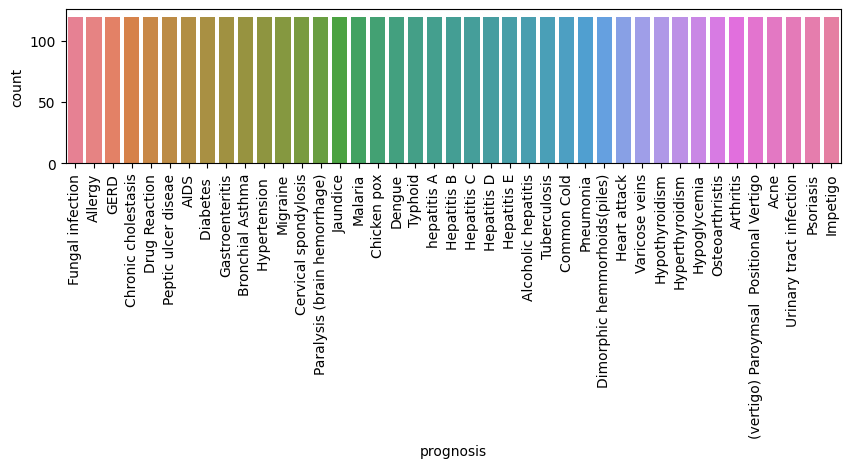

In [106]:
#Finding out the different types of disease to be predicted
plt.figure(figsize=(10,2))
sns.countplot(data=df,x='prognosis',hue='prognosis')
plt.xticks(rotation=90);

In [107]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [108]:
#We can infer that all classes have equal counts. This implies that all the classes are balanced.

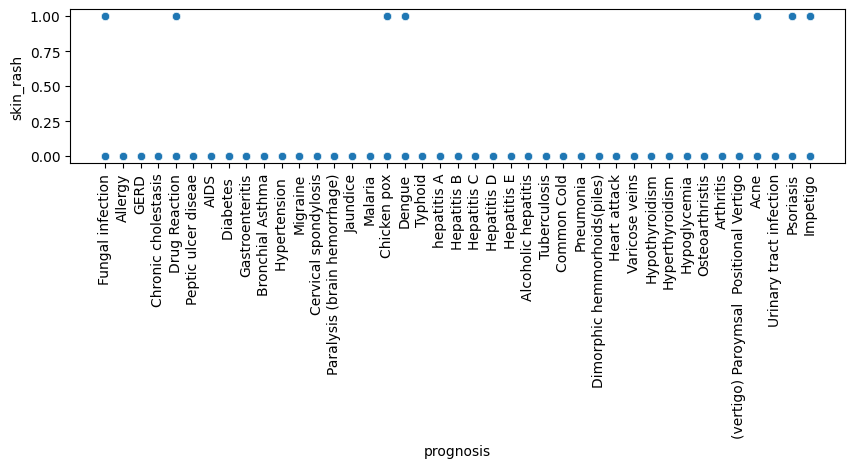

In [109]:
#Graphically checking a the influence of 'skin_rash' on disease type
plt.figure(figsize=(10,2))
sns.scatterplot(data=df,x='prognosis',y='skin_rash')
plt.xticks(rotation=90);
#Only yes/no

In [110]:
#This data set has all values as either a yes or no (1 or 0). Therefore there is no need to scale the features or convert them to dummy variables.

In [111]:
#Getting the features and Labels 
X=df.drop('prognosis',axis=1)
y=df['prognosis']

In [112]:
#Scaling the y label from categories to a set of numerals
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_encoded=encoder.fit_transform(y)

In [113]:
y_encoded

array([15, 15, 15, ..., 38, 35, 27])

In [114]:
#Using cross validation to test the performance of a variety of supervised classification models

In [115]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [116]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y,estimator.predict(X))
    
models={
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'RandomForestClassifier':RandomForestClassifier(random_state=10),
    'GaussianNB':GaussianNB()
}
for model_name in models:
    model=models[model_name]
    scores=cross_val_score(model,X,y_encoded,cv=10,scoring=cv_scoring)

    print('--'*30)
    print(f'MODEL:{model_name}')
    print(f'scores:{scores}')
    print(f'Mean Score: {np.mean(scores)}')

------------------------------------------------------------
MODEL:Logistic Regression
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
------------------------------------------------------------
MODEL:SVC
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
------------------------------------------------------------
MODEL:RandomForestClassifier
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
------------------------------------------------------------
MODEL:GaussianNB
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [117]:
#All the models have a perfect mean accuracy score. Hence lets train the models on the entire training data and get their performance on the validation test

In [118]:
val_test=pd.read_csv('Testing.csv')

In [119]:
#Getting the features and label data for validation'
X_val=val_test.drop('prognosis',axis=1)
y_val=val_test['prognosis']

In [120]:
#Label Encoding y validation
y_val_encoded=encoder.transform(y_val)

In [121]:
#fitting training set and getting validation test score fro each model
models={
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'RandomForestClassifier':RandomForestClassifier(random_state=10),
    'GaussianNB':GaussianNB()
}
for model_name in models:
    model=models[model_name]
    model.fit(X,y_encoded)
    y_pred=model.predict(X_val)
    score=accuracy_score(y_val_encoded,y_pred)

    print('--'*30)
    print(f'MODEL:{model_name}')
    print(f'ACCURACY SCORE:{score*100}')

------------------------------------------------------------
MODEL:LogisticRegression
ACCURACY SCORE:100.0
------------------------------------------------------------
MODEL:SVC
ACCURACY SCORE:100.0
------------------------------------------------------------
MODEL:RandomForestClassifier
ACCURACY SCORE:97.61904761904762
------------------------------------------------------------
MODEL:GaussianNB
ACCURACY SCORE:100.0


In [122]:
#Since most of the models are near perfect at preficting.Let's try to make a combined model.

In [123]:
from scipy.stats import mode
from sklearn.metrics import ConfusionMatrixDisplay

ACCURACY SCORE:100.0


<Figure size 1200x1200 with 0 Axes>

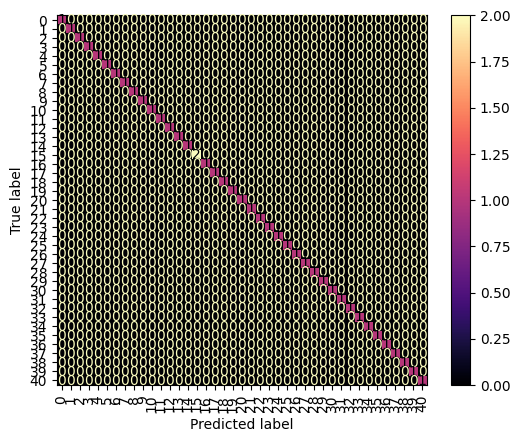

In [124]:
#Combined Model

#Creating an instance of each of the model
svc_model=SVC()
log_model=LogisticRegression()
rfc_model=RandomForestClassifier(random_state=10)
nb_model=GaussianNB()

#Fitting all the models on the entire data
svc_model.fit(X,y_encoded)
log_model.fit(X,y_encoded)
rfc_model.fit(X,y_encoded)
nb_model.fit(X,y_encoded)

#Predicting each model output
svc_pred=svc_model.predict(X_val)
log_pred=log_model.predict(X_val)
rfc_pred=rfc_model.predict(X_val)
nb_pred=nb_model.predict(X_val)

#Final prediction of a particular index would be the mode of all 4 predictions
final_pred=[mode([i,j,k,l])[0]for i,j,k,l in zip(svc_pred,log_pred,rfc_pred,nb_pred)]
score=accuracy_score(y_val_encoded,final_pred)

#Printing the accuracy score of the combined model
print(f'ACCURACY SCORE:{score*100}')

#Confusion matrix
plt.figure(figsize=(12,12))
ConfusionMatrixDisplay.from_predictions(y_val_encoded,final_pred,cmap='magma',xticks_rotation='vertical');

In [125]:
#From the confusion matrix, we can clearly see that we have a perfectly predicting models as all values are 0 except the diagonal, implying that all prediction were correct

<hr>